Modulo 2 : Exploratory Data Analyse

In [1]:
!poetry add pyarrow

Using version ^17.0.0 for pyarrow

Updating dependencies
Resolving dependencies...

Package operations: 1 install, 0 updates, 0 removals

  - Installing sklearn (0.0.post7)

  ChefBuildError

  Backend subprocess exited when trying to invoke get_requires_for_build_wheel
  
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'

  rather than 'sklearn' for pip commands. 

  

  Here is how to fix this error in the main use cases:

  - use 'pip install scikit-learn' rather than 'pip install sklearn'

  - replace 'sklearn' by 'scikit-learn' in your pip requirements files

    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)

  - if the 'sklearn' package is used by one of your dependencies,

    it would be great if you take some time to track which package uses

    'sklearn' instead of 'scikit-learn' and report it to their issue tracker

  - as a last resort, set the environment variable

    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error

  



In [2]:
!poetry add seaborn

Using version ^0.13.2 for seaborn

Updating dependencies
Resolving dependencies...

Package operations: 1 install, 0 updates, 0 removals

  - Installing sklearn (0.0.post7)

  ChefBuildError

  Backend subprocess exited when trying to invoke get_requires_for_build_wheel
  
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'

  rather than 'sklearn' for pip commands. 

  

  Here is how to fix this error in the main use cases:

  - use 'pip install scikit-learn' rather than 'pip install sklearn'

  - replace 'sklearn' by 'scikit-learn' in your pip requirements files

    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)

  - if the 'sklearn' package is used by one of your dependencies,

    it would be great if you take some time to track which package uses

    'sklearn' instead of 'scikit-learn' and report it to their issue tracker

  - as a last resort, set the environment variable

    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error

  



In [3]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")

In [4]:
import os
from dotenv import load_dotenv
import boto3
import ctypes, sys

# Load the .env file
load_dotenv()

# Now you can access the environment variables
aws_access_key = os.getenv('AWS_ACCESS_KEY_ID')
aws_secret_key = os.getenv('AWS_SECRET_ACCESS_KEY')
aws_region = os.getenv('AWS_DEFAULT_REGION')
db_url = os.getenv('DATABASE_URL')

s3 = boto3.client(
    's3',
    aws_access_key_id=aws_access_key,
    aws_secret_access_key=aws_secret_key,
    region_name=aws_region
)

In [5]:
def download_file_from_s3(bucket_name, file_key, download_path):
    try:
        # Download the file from the specified S3 bucket
        s3.download_file(bucket_name, file_key, download_path)
        print(f"File '{file_key}' downloaded successfully to {download_path}")
    except Exception as e:
        print(f"Error downloading file: {e}")

In [6]:
def list_files_in_bucket(bucket_name):
    try:
        response = s3.list_objects_v2(Bucket=bucket_name)
        if 'Contents' in response:
            print("Files in bucket:")
            for obj in response['Contents']:
                print(obj['Key'])
        else:
            print(f"No files found in bucket {bucket_name}")
    except Exception as e:
        print(f"Error listing files in bucket: {e}")

In [7]:
bucket_name = 'zrive-ds-data'
file_key = 'groceries/box_builder_dataset/feature_frame.csv'  # The S3 object key (file path in the bucket)
download_path = r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\model.joblib'  # Where to save the file locally
list_files_in_bucket(bucket_name)

Files in bucket:
groceries/box_builder_dataset/feature_frame.csv
groceries/sampled-datasets/abandoned_carts.parquet
groceries/sampled-datasets/inventory.parquet
groceries/sampled-datasets/orders.parquet
groceries/sampled-datasets/regulars.parquet
groceries/sampled-datasets/users.parquet
groceries/trained-models/model.joblib


In [8]:
download_file_from_s3(bucket_name,"groceries/trained-models/model.joblib"
, download_path)

File 'groceries/trained-models/model.joblib' downloaded successfully to C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\model.joblib


In [9]:
download_path = r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\feature_frame.csv'
download_file_from_s3(bucket_name,"groceries/box_builder_dataset/feature_frame.csv"
, download_path)

File 'groceries/box_builder_dataset/feature_frame.csv' downloaded successfully to C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\feature_frame.csv


In [10]:
download_path = r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\inventory.parquet'
download_file_from_s3(bucket_name,"groceries/sampled-datasets/inventory.parquet"
, download_path)

File 'groceries/sampled-datasets/inventory.parquet' downloaded successfully to C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\inventory.parquet


In [11]:
download_path = r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\abandoned_carts.parquet'
download_file_from_s3(bucket_name,"groceries/sampled-datasets/abandoned_carts.parquet"
, download_path)

File 'groceries/sampled-datasets/abandoned_carts.parquet' downloaded successfully to C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\abandoned_carts.parquet


In [17]:
download_path = r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\orders.parquet'
download_file_from_s3(bucket_name,"groceries/sampled-datasets/orders.parquet"
, download_path)

File 'groceries/sampled-datasets/orders.parquet' downloaded successfully to C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\orders.parquet


In [18]:
download_path = r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\regulars.parquet'
download_file_from_s3(bucket_name,"groceries/sampled-datasets/regulars.parquet"
, download_path)

File 'groceries/sampled-datasets/regulars.parquet' downloaded successfully to C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\regulars.parquet


In [19]:
download_path = r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\users.parquet'
download_file_from_s3(bucket_name,"groceries/sampled-datasets/users.parquet"
, download_path)

File 'groceries/sampled-datasets/users.parquet' downloaded successfully to C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\users.parquet


In [ ]:
download_path = r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\users.parquet'
download_file_from_s3(bucket_name,"groceries/sampled-datasets/users.parquet"
, download_path)

In [12]:
orders = pd.read_parquet(r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\orders.parquet')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


In [13]:
orders.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [14]:
users = pd.read_parquet(r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\users.parquet')
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


In [15]:
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [16]:
users.dropna().head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
4751,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0
3154,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0
736,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0
4792,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0
2217,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0


In [17]:
regulars = pd.read_parquet(r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\regulars.parquet')
regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


In [18]:
regulars.head()

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11


In [19]:
inventory = pd.read_parquet(r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\inventory.parquet')
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [20]:
inventory.head()

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


In [21]:
abandoned_carts = pd.read_parquet(r'C:\Users\Alberto\Desktop\Zrive\zrive-ds\Data set_Modulo2\abandoned_carts.parquet')
abandoned_carts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


Tenemos ya los datos de todos los archivos parquet y en Pandas.

Pasamos al analisis:

1. Profiling buyer population
2. Analyse regulars products
3. Reconstruct orders and abandoneed orders with inventory information.

1. Profiling buyer population

In [22]:
n_regulars = (
    regulars.groupby("user_id") ["variant_id"]
    .nunique()
    .reset_index()
    .rename(columns={"variant_id": "n_regulars"})
)

users = users.merge(n_regulars, on="user_id", how = "left").fillna({"n_regulars":0})

In [23]:
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,n_regulars
0,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
1,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
2,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
3,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
4,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0


In [24]:
users.dropna().head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,n_regulars
23,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0,0.0
27,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0,1.0
28,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0,25.0
35,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0,72.0
66,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0,3.0


In [25]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets,n_regulars
count,325.000000,325.000000,325.000000,325.000000,325.000000,4983.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923,2.481437
std,1.365753,0.869577,1.026246,0.289086,0.995603,8.890588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000,320.000000


<Axes: >

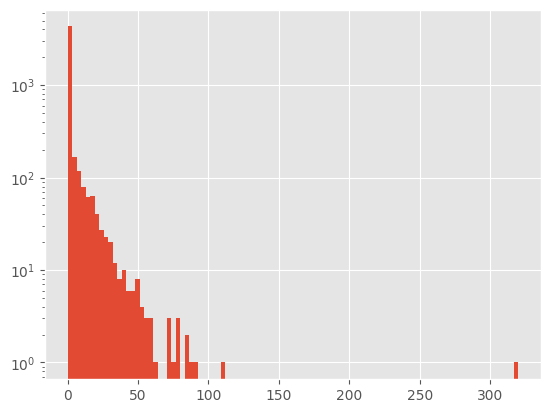

In [26]:
users["n_regulars"].hist(bins=100, log=True)

In [27]:
users.loc[lambda x : x.n_regulars < 100].n_regulars.describe()
# Para el n_regulars filtrado con los menores de 100 ==> estadisticas del describe (Solo util para ver un poco de que van los datos)

count    4981.000000
mean        2.396105
std         7.516721
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        90.000000
Name: n_regulars, dtype: float64

In [28]:
(users ["n_regulars"] > 10).sum() / len(users)
#Porcentaje de usuarios con mas de 10 productos guardados en favoritos

0.07264699979931769

<Axes: xlabel='user_segment'>

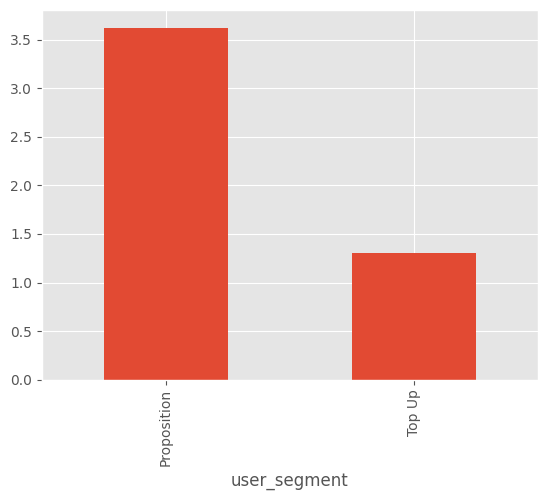

In [29]:
users.loc[lambda x:x.n_regulars < 100].groupby("user_segment")["n_regulars"].mean().plot(kind="bar")
#Average numbeer of regulars per user segment

In [30]:
family_cols = [col for col in users.columns if col.startswith("count_")]
family_inputs = users.count_people.dropna().count()

d = {f"any_{col}": (users[col] > 0).sum() / family_inputs for col in family_cols}
d

{'any_count_people': 0.9938461538461538,
 'any_count_adults': 0.9907692307692307,
 'any_count_children': 0.4,
 'any_count_babies': 0.07076923076923076,
 'any_count_pets': 0.40615384615384614}

In [31]:
(
    users[["count_pets","count_children","count_babies"]].sum(axis=1)>0
).sum() / family_inputs

0.6123076923076923

<Axes: xlabel='user_nuts1'>

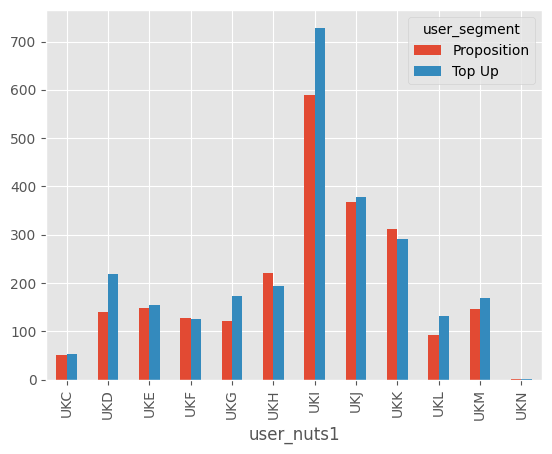

In [32]:
pd.crosstab(users["user_nuts1"],users["user_segment"]).plot(kind="bar")

Interpretaciones:
1. Pocas personas tienes productos regular (Solo el 7% tiene mas de 10)
2. Proposition users tienen mas regular que los top-up
3. No tenemos infomacion de la familia para la mayoria de los usuarios (solo el 6.5%)
4. La mayoria de los usuarios son parejas (Los otros casos representan menos del 25%)
5. 60% de los usuarios tienen niños, mascotas o bebes.
6. Solo el 7% de los usuarios tienen bebes

2. Understanding regular products

In [33]:
regulars_df= regulars.merge(inventory, on="variant_id", how= "left")


In [34]:
regulars_df.head()

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
0,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
1,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
2,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
3,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,3.49,3.5,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]"


In [35]:
clean_regulars = regulars_df.dropna()

<Axes: xlabel='variant_id'>

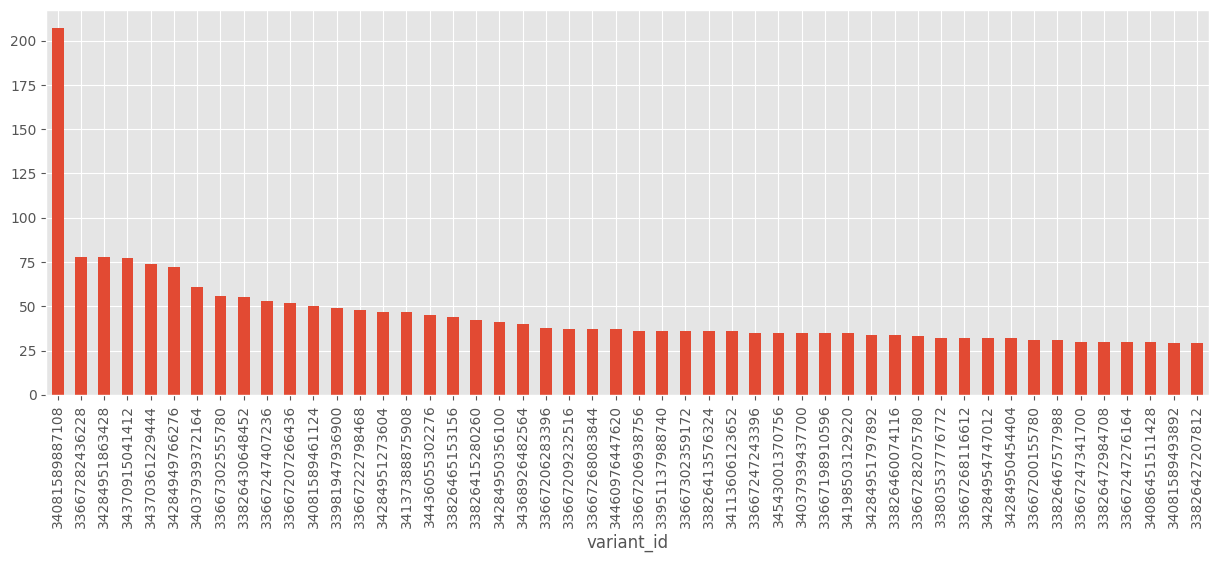

In [36]:
clean_regulars.groupby(["variant_id"])["user_id"].nunique().sort_values(
    ascending=False
).head(50).plot(kind="bar", figsize=(15, 5))

In [37]:
top_product= (
    clean_regulars.groupby(["variant_id"])["user_id"].nunique().sort_values(
    ascending=False
).head(1).index[0]
)
clean_regulars.loc[lambda x : x.variant_id == top_product][["variant_id", "price", "product_type", "vendor"]].drop_duplicates()

,variant_id,price,product_type,vendor
95,34081589887108,10.79,long-life-milk-substitutes,oatly


TypeError: 'module' object is not callable

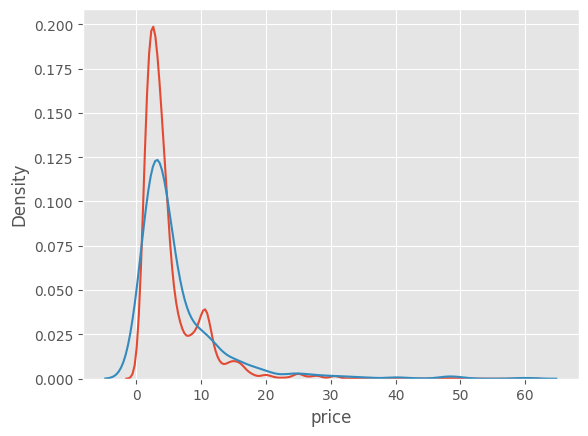

In [52]:
sns.kdeplot(clean_regulars.price, label="regulars_price")
sns.kdeplot(inventory.price, label="inventory_price")
plt.legend()

AttributeError: module 'matplotlib' has no attribute 'title'

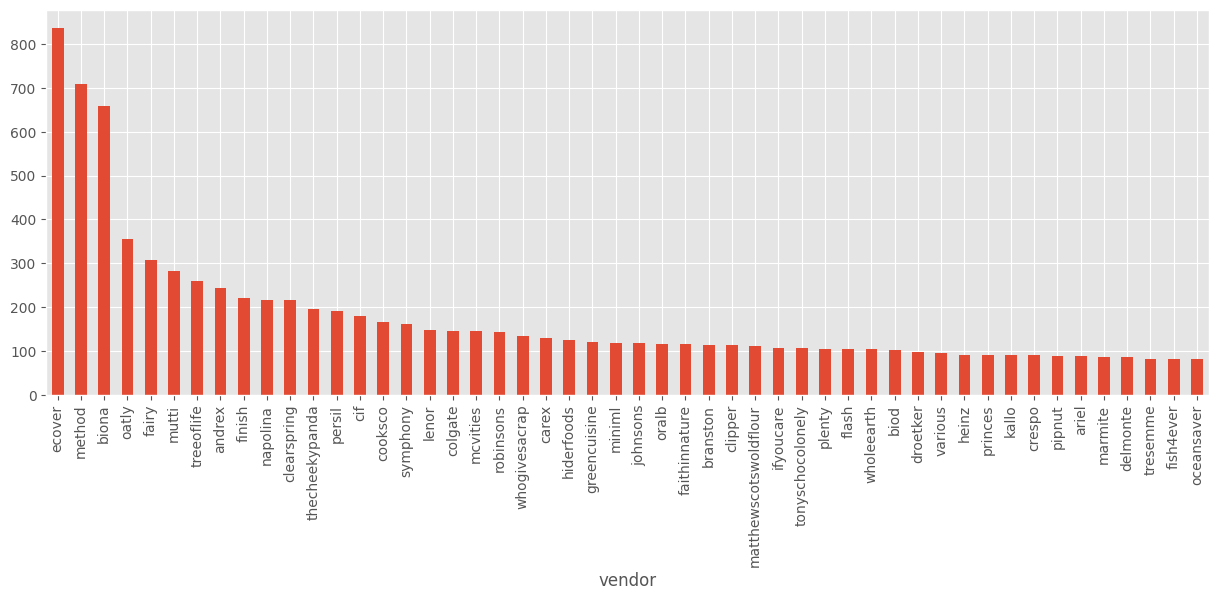

In [39]:
clean_regulars["vendor"].value_counts().head(50).plot(kind="bar", figsize=(15, 5))
plt.title(
    f"Top 50 vendors by number of regulars (out of {clean_regulars.vendor.nunique()} vendors)"
)


AttributeError: module 'matplotlib' has no attribute 'title'

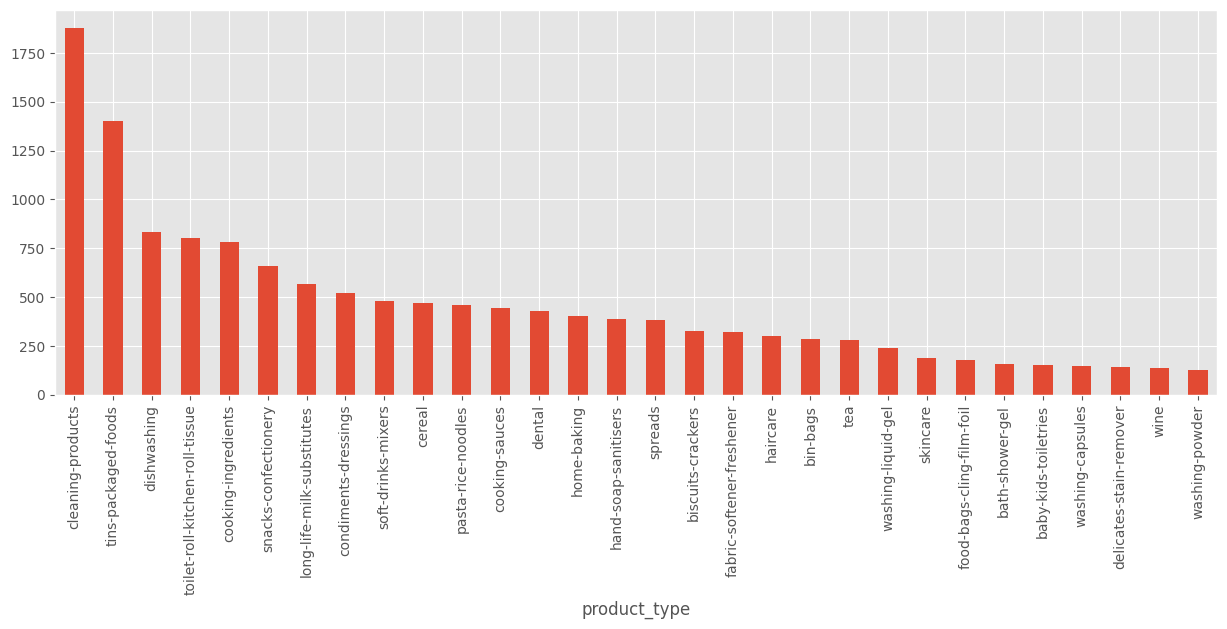

In [40]:
clean_regulars["product_type"].value_counts().head(30).plot(kind="bar", figsize=(15, 5))
plt.title(
    f"Top 30 product_type by number of regulars (out of {clean_regulars.product_type.nunique()} product_types)"
)


AttributeError: module 'matplotlib' has no attribute 'title'

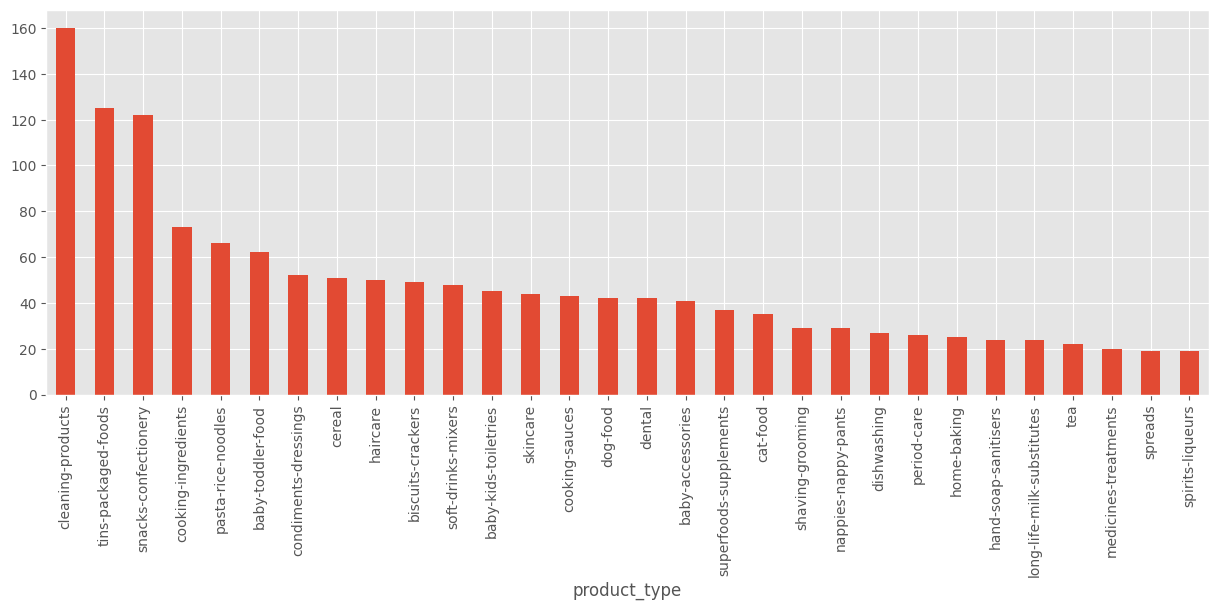

In [41]:
inventory["product_type"].value_counts().head(30).plot(kind="bar", figsize=(15, 5))
plt.title(
    f"Top 50 product_type by number of regulars (out of {clean_regulars.product_type.nunique()} product_types)"
)


In [42]:
diff_prevalence = (
    inventory["product_type"]
    .value_counts(normalize=True)
    .rename("inventory_count")
    .reset_index()
    .merge(
        clean_regulars["product_type"]
        .value_counts(normalize=True)
        .rename("regulars_count")
        .reset_index()
    )
    .assign(inventory_rank=lambda x: x.inventory_count.rank(ascending=False))
    .assign(regulars_rank=lambda x: x.regulars_count.rank(ascending=False))
    .assign(diff=lambda x: x.inventory_count - x.regulars_count)
)


In [43]:
diff_prevalence.sort_values("regulars_count", ascending = False).head(10)

,product_type,inventory_count,regulars_count,inventory_rank,regulars_rank,diff
0,cleaning-products,0.092325,0.124850,1.0,1.0,-0.032525
1,tins-packaged-foods,0.072129,0.093255,2.0,2.0,-0.021126
21,dishwashing,0.015580,0.055474,22.0,3.0,-0.039894
31,toilet-roll-kitchen-roll-tissue,0.010387,0.053346,32.5,4.0,-0.042959
3,cooking-ingredients,0.042123,0.052148,4.0,5.0,-0.010025
2,snacks-confectionery,0.070398,0.043900,3.0,6.0,0.026498
25,long-life-milk-substitutes,0.013849,0.037648,25.5,7.0,-0.023799
6,condiments-dressings,0.030006,0.034655,7.0,8.0,-0.004649
10,soft-drinks-mixers,0.027698,0.032061,11.0,9.0,-0.004363
7,cereal,0.029429,0.031329,8.0,10.0,-0.001900


Reconstruir Orders

In [44]:
orders.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [45]:
orders.order_date.min(), orders.order_date.max()

(Timestamp('2020-04-30 00:00:00'), Timestamp('2022-03-14 00:00:00'))

In [46]:
orders.user_id.nunique()

4983

In [47]:
orders.loc[lambda x: x.user_order_seq > 1].user_id.nunique()

1411

<Axes: xlabel='user_order_seq'>

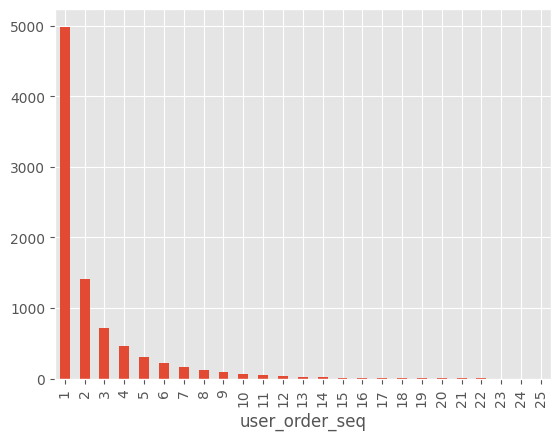

In [48]:
orders["user_order_seq"].value_counts().plot(kind="bar")

<Axes: xlabel='user_order_seq'>

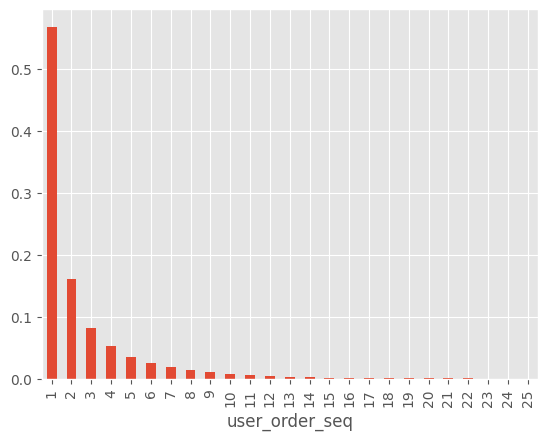

In [53]:
orders.user_order_seq.value_counts(normalize=True).plot(kind="bar") # Cual es la diferencia entre llamar a user_order_seq asi o como hago arriba orders["user_order_seq"]. Es lo mismo?

In [55]:
order_items = orders.explode("ordered_items").rename(
    {"ordered_items" : "variant_id"}, axis=1
)

In [56]:
order_items.head()

,id,user_id,created_at,order_date,user_order_seq,variant_id
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618849693828
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618860179588
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618874040452
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060


In [57]:
order_items = order_items.merge(inventory, on="variant_id", how="left")

In [58]:
order_items.head()

,id,user_id,created_at,order_date,user_order_seq,variant_id,price,compare_at_price,vendor,product_type,tags
0,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618849693828,NaN,NaN,NaN,NaN,NaN
1,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618860179588,NaN,NaN,NaN,NaN,NaN
2,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618874040452,NaN,NaN,NaN,NaN,NaN
3,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060,NaN,NaN,NaN,NaN,NaN
4,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060,NaN,NaN,NaN,NaN,NaN


In [59]:
order_items.dropna().head()

,id,user_id,created_at,order_date,user_order_seq,variant_id,price,compare_at_price,vendor,product_type,tags
70,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,4.19,5.10,listerine,dental,[mouthwash]
71,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,4.19,5.10,listerine,dental,[mouthwash]
76,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206054020,17.99,20.65,ecover,delicates-stain-remover,"[cruelty-free, delicates-stain-remover, eco, v..."
77,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206283396,9.99,12.00,ecover,fabric-softener-freshener,"[cruelty-free, eco, fabric-softener-freshener,..."
81,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,39459277602948,5.79,5.98,ecloth,cleaning-products,"[eco, sponges-cloths-gloves]"


In [74]:
x = 100*order_items.price.isna().sum() / order_items.shape[0]
print(x)



14.447285055299282


In [78]:
def compute_basket_composition(df: pd.DataFrame, level: str) -> pd.DataFrame: return(
            df.dropna(subset=[level])
            .drop_duplicates(subset=["id",level])
            .groupby([level])["id"]
            .nunique()
            .reset_index()
            .rename(columns={"id": "n_baskets"})
            .assign(pct_baskets=lambda x: x.n_baskets / orders.id.nunique())
)

In [79]:
product_type_composition = compute_basket_composition(order_items, "product_type")

In [80]:
product_type_composition.sort_values(ascending=False, by="n_baskets").head(10)

,product_type,n_baskets,pct_baskets
12,cleaning-products,3500,0.398951
51,tins-packaged-foods,3281,0.373988
52,toilet-roll-kitchen-roll-tissue,3131,0.356890
29,long-life-milk-substitutes,2657,0.302861
20,dishwashing,2632,0.300011
44,snacks-confectionery,1920,0.218853
15,cooking-ingredients,1817,0.207113
45,soft-drinks-mixers,1793,0.204377
14,condiments-dressings,1732,0.197424
10,cereal,1653,0.188419


<Axes: xlabel='product_type'>

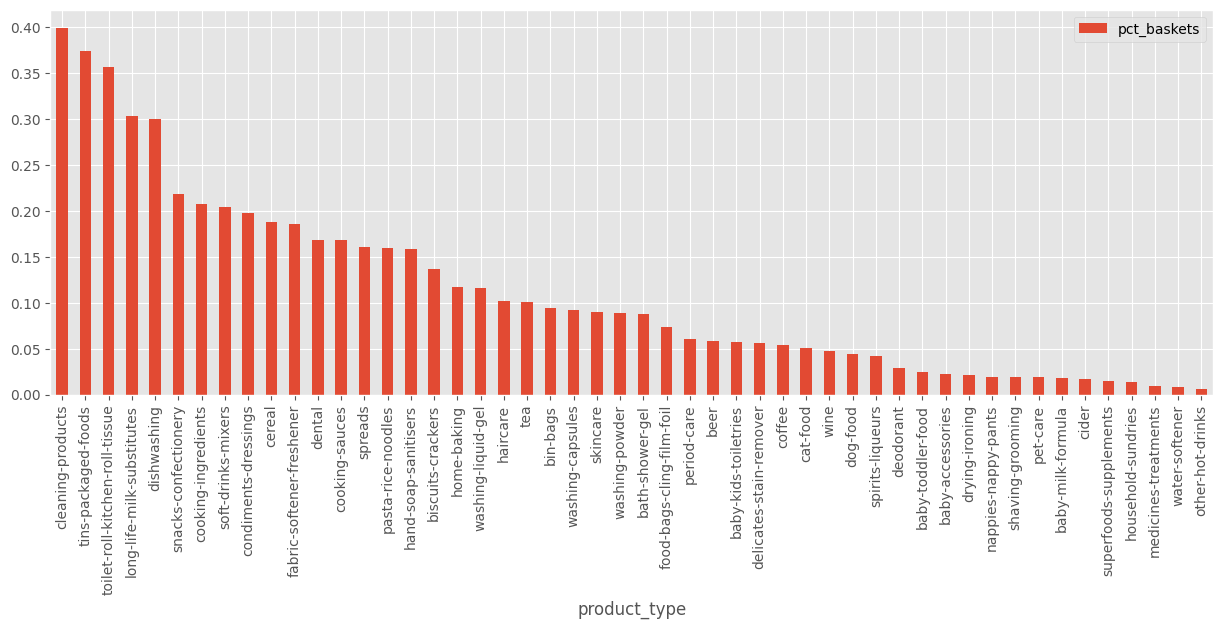

In [81]:
product_type_composition.sort_values(ascending=False, by="n_baskets").head(50).plot(
    x="product_type", y="pct_baskets", kind="bar", figsize=(15, 5)
)


In [82]:
variant_id_composition = compute_basket_composition(order_items, "variant_id")
variant_id_composition.sort_values(ascending=False, by="n_baskets").head(10)

,variant_id,n_baskets,pct_baskets
1324,39284117930116,2658,0.302975
675,34081589887108,1616,0.184202
726,34137590366340,1459,0.166306
656,34081331970180,1170,0.133364
853,34284951863428,862,0.098256
829,34284949766276,617,0.070329
983,34370361229444,587,0.066910
835,34284950356100,561,0.063946
632,34037939372164,520,0.059273
993,34370915041412,504,0.057449


<Axes: xlabel='variant_id'>

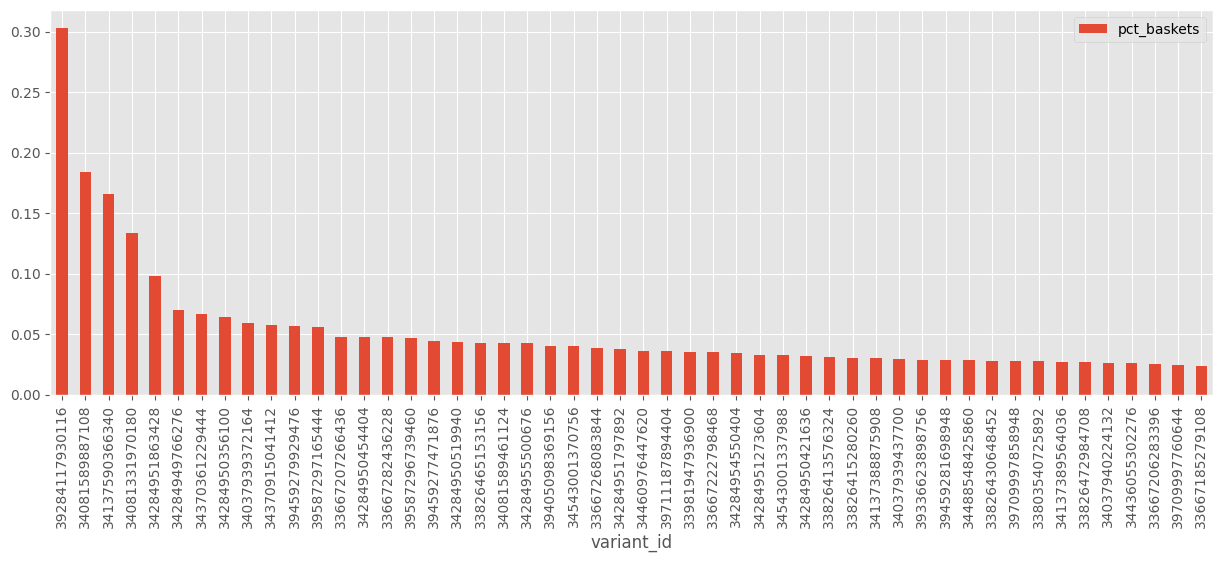

In [84]:
variant_id_composition.sort_values(ascending=False, by="n_baskets").head(50).plot(
    x="variant_id", y="pct_baskets", kind="bar", figsize=(15, 5)
)

In [85]:
top_5_products = (
    variant_id_composition.sort_values(ascending=False, by="n_baskets")
    .head(5)
    .variant_id.values
)

inventory.loc[lambda x: x.variant_id.isin(top_5_products)]

,variant_id,price,compare_at_price,vendor,product_type,tags
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
63,34081589887108,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"


In [89]:
def compute_orders_size_and_value(x):
    return pd.Series(
        {
            "order_size": len(x),
            "n_unique_products": x.variant_id.nunique(),
            "order_value": x.price.sum(),
            "ratio_missing_prod_data": x.price.isna().sum() / len(x),
        }
    )

orders_size = (
    order_items.groupby(["id", "order_date"])
    .apply(compute_orders_size_and_value)
    .reset_index()
)


In [90]:
orders_size.head()

,id,order_date,order_size,n_unique_products,order_value,ratio_missing_prod_data
0,2204073066628,2020-04-30,14.0,12.0,0.00,1.0
1,2204707520644,2020-04-30,25.0,23.0,0.00,1.0
2,2204838822020,2020-04-30,15.0,13.0,0.00,1.0
3,2208967852164,2020-05-01,10.0,9.0,0.00,1.0
4,2215889436804,2020-05-03,10.0,8.0,8.38,0.8


In [91]:
orders_size.tail()

,id,order_date,order_size,n_unique_products,order_value,ratio_missing_prod_data
8768,4026096910468,2022-03-13,17.0,14.0,79.13,0.0
8769,4026464993412,2022-03-13,9.0,9.0,43.41,0.0
8770,4026553434244,2022-03-13,4.0,2.0,43.96,0.0
8771,4026656030852,2022-03-13,4.0,1.0,63.96,0.0
8772,4026732413060,2022-03-14,13.0,11.0,40.47,0.0


Final

In [92]:
orders_size.tail()

,id,order_date,order_size,n_unique_products,order_value,ratio_missing_prod_data
8768,4026096910468,2022-03-13,17.0,14.0,79.13,0.0
8769,4026464993412,2022-03-13,9.0,9.0,43.41,0.0
8770,4026553434244,2022-03-13,4.0,2.0,43.96,0.0
8771,4026656030852,2022-03-13,4.0,1.0,63.96,0.0
8772,4026732413060,2022-03-14,13.0,11.0,40.47,0.0
